In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()

In [2]:
def cv(res, alpha=0.25):
    cvar = np.zeros(res.shape[0])
    var = np.sort(res)[int(len(res) * alpha)]
    idx = np.where(res <= var)
    cvar = np.mean(res[idx])
    return cvar

In [3]:
def mv(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [4]:
from core import config, drl, replay
import tensorflow as tf
from argparse import Namespace
from utils.hiv_env import * 

def discounted_return(returns, gamma):
    ret = 0
    for r in reversed(returns):
        ret = r + gamma * ret
    return ret

/home/ramtin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


5 actionabe step, zero stochasticty, expectaiton

Text(0.5,1,'Retuns')

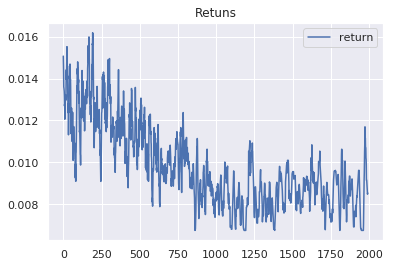

In [6]:
data = pickle.load(open('results/det_exp_5_2000.p', 'rb'))
res = mv(data['returns'][:2000, 0], 10)
plt.plot(res, label = 'return')
plt.legend()
plt.title("Retuns")

This is obviosuly not even improving, hypotheis 1: reward scale, Now make it divided by 1e6

Text(0.5,1,'Retuns')

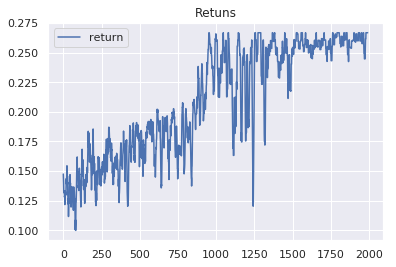

In [12]:
data = pickle.load(open('results/det_exp_5_2000.p', 'rb'))
res = mv(data['returns'][:2000, 0], 10)
plt.plot(res, label = 'return')
plt.legend()
plt.title("Retuns")

This one at least has a upwrd trend. Let's increase the reward scale one more : divided by 1e5

Text(0.5,1,'Retuns')

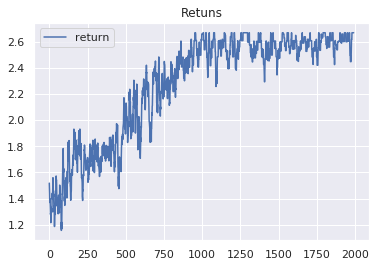

In [15]:
data = pickle.load(open('results/det_exp_5_2000.p', 'rb'))
res = mv(data['returns'][:2000, 0], 10)
plt.plot(res, label = 'return')
plt.legend()
plt.title("Retuns")

It is way more stable with 1e5 now! 

Let's check the log scale for the reward.

Text(0.5,1,'Retuns')

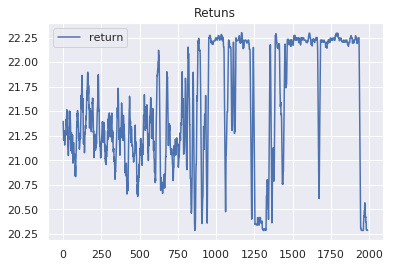

In [19]:
data = pickle.load(open('results/det_exp_5_2000.p', 'rb'))
res = mv(data['returns'][:2000, 0], 10)
plt.plot(res, label = 'return')
plt.legend()
plt.title("Retuns")

Let's go with 1e5, for actionable step = 5

Increase action steps to 10 (-10, 40 is the limit of return)

Text(0.5,1,'Retuns')

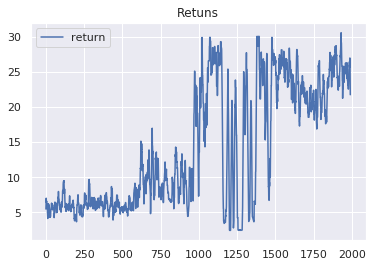

In [24]:
data = pickle.load(open('results/det_exp_10_2000.p', 'rb'))
res = mv(data['returns'][:2000, 0], 10)
plt.plot(res, label = 'return')
plt.legend()
plt.title("Retuns")

actionable 10 was also enough with 1e5. 
Now let's do actionable 20, with (5\*1e5) -- this will return a disounted reward in the order of 200 - 300 which out of Vmax, so we need to 1e6,let's try that, and change the dsocunt factor to 0.9

Max return: 164.249


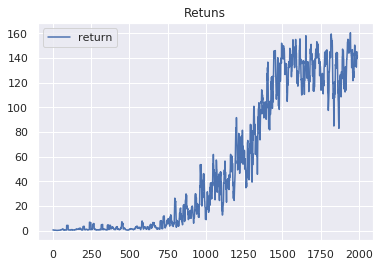

In [31]:
data = pickle.load(open('results/det_exp_20_2000.p', 'rb'))
res = mv(data['returns'][:2000, 0], 10)
plt.plot(res, label = 'return')
plt.legend()
plt.title("Retuns")
print("Max return: %g"%(np.max(data['returns'][:, 0])))

This still hits the limit, maybe I need to increase the Vmax to 200?

So now, let's make Vmax = 200, and add stocastoicity with 0 bias and 0.01 noise to eps. and gamma = 0.9

Max return: 168.621


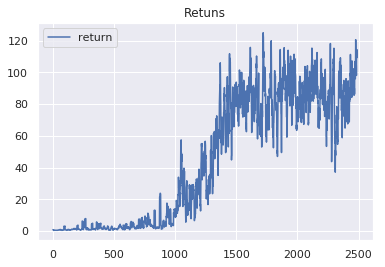

In [36]:
data = pickle.load(open('results/st_exp_20_2500.p', 'rb'))
res = mv(data['returns'][:2500, 0], 10)
plt.plot(res, label = 'return')
plt.legend()
plt.title("Retuns")
print("Max return: %g"%(np.max(data['returns'][:, 0])))

Now, that works, let's try one more experiments, add bias to the noise:
with 0 bias and 0.01 noise to eps. and gamma = 0.9. But set CVar true, and $\alpha$=0.95

Max return: 176.958


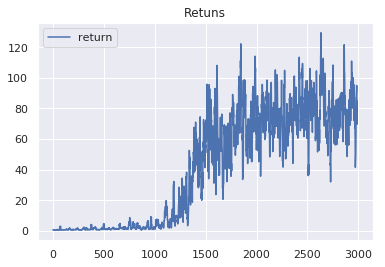

In [40]:
data = pickle.load(open('results/st_cvar_95_3000.p', 'rb'))
res = mv(data['returns'][:3000, 0], 10)
plt.plot(res, label = 'return')
plt.legend()
plt.title("Retuns")
print("Max return: %g"%(np.max(data['returns'][:, 0])))

Now, that works, let's try one more experiments, add bias to the noise:
with 0.1 bias and 0.01 noise to eps. and gamma = 0.9

Max return: 167.739


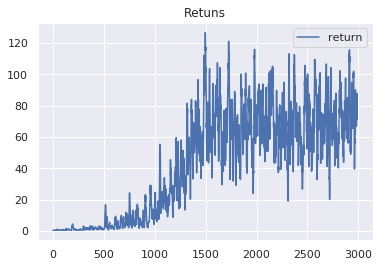

In [37]:
data = pickle.load(open('results/st_exp_20_3000.p', 'rb'))
res = mv(data['returns'][:3000, 0], 10)
plt.plot(res, label = 'return')
plt.legend()
plt.title("Retuns")
print("Max return: %g"%(np.max(data['returns'][:, 0])))

Now, that works, let's try one more experiments, add bias to the noise:
with 0 bias and 0.01 noise to eps. and gamma = 0.9. But set CVar true, and $\alpha$=0.5

Max return: 178.354


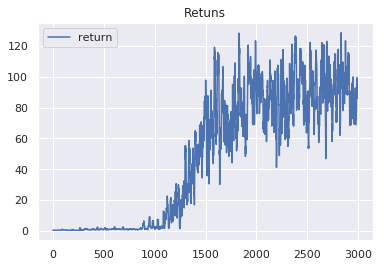

In [48]:
data = pickle.load(open('results/st_cvar_5_3000.p', 'rb'))
res = mv(data['returns'][:30000, 0], 10)
plt.plot(res, label = 'return')
plt.legend()
plt.title("Retuns")
print("Max return: %g"%(np.max(data['returns'][:, 0])))

Now, that works, let's try one more experiments, add bias to the noise:
with 0.1 bias and 0.01 noise to eps. and gamma = 0.9. But set CVar true, and $\alpha$=0.5

Max return: 163.634


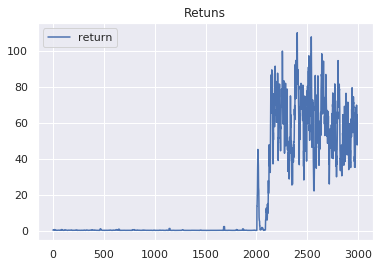

In [45]:
data = pickle.load(open('results/st_cvar_20_5_3000.p', 'rb'))
res = mv(data['returns'][:30000, 0], 10)
plt.plot(res, label = 'return')
plt.legend()
plt.title("Retuns")
print("Max return: %g"%(np.max(data['returns'][:, 0])))

Now, change the stochasticity, to 0 bias and 0.01 noise ad gamma =0.9 and $\alpha=0.25$

Max return: 9.08135


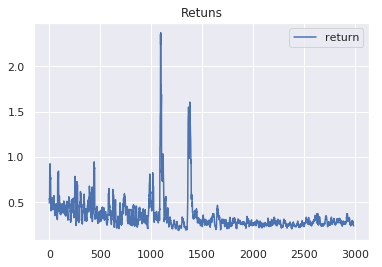

In [74]:
data = pickle.load(open('results/st_cvar_25_3000.p', 'rb'))
res = mv(data['returns'][:3000, 0], 10)
plt.plot(res, label = 'return')
plt.legend()
plt.title("Retuns")
print("Max return: %g"%(np.max(data['returns'][:, 0])))

0 bias and 0.01 noise ad gamma =0.9 and $\alpha=0.25$
with 251 atoms

Max return: 147.706


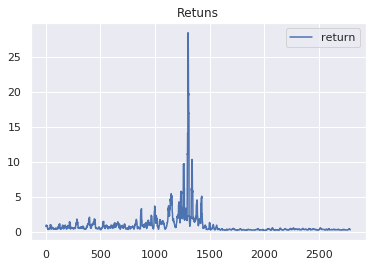

In [109]:
data = pickle.load(open('results/st_cvar_201_25_2800.p', 'rb'))
res = mv(data['returns'][:2800, 0], 10)
plt.plot(res, label = 'return')
plt.legend()
plt.title("Retuns")
print("Max return: %g"%(np.max(data['returns'][:, 0])))

Now, change the stochasticity, to 0 bias and 0.01 noise ad gamma =0.9 and $\alpha=0.25$, decrease Vmax to 20, and 151 atoms

Max return: 175.62


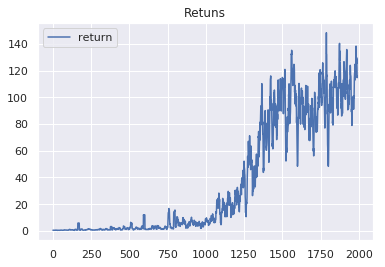

In [108]:
data = pickle.load(open('results/st_cvar_25_lowVmax_2000.p', 'rb'))
res = mv(data['returns'][:2000, 0], 10)
plt.plot(res, label = 'return')
plt.legend()
plt.title("Retuns")
print("Max return: %g"%(np.max(data['returns'][:, 0])))

Run with optimism:
Now, increase the stochasticity, to 0 bias and 0.01 noise ad gamma =0.9 and $\alpha=0.25$

Max return: 172.706


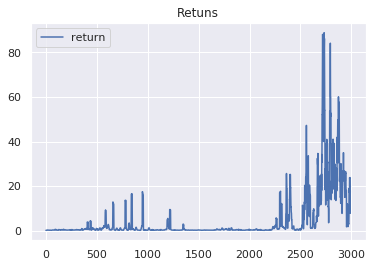

In [107]:
data = pickle.load(open('results/st_cvar_opt_25_3000.p', 'rb'))
res = mv(data['returns'][:3000, 0], 10)
plt.plot(res, label = 'return')
plt.legend()
plt.title("Retuns")
print("Max return: %g"%(np.max(data['returns'][:, 0])))

Run with optimism:
Now, increase the stochasticity, to 0 bias and 0.01 noise ad gamma =0.9 and $\alpha=0.25$, now try optimim wih lower Vmax = 20

Max return: 171.405


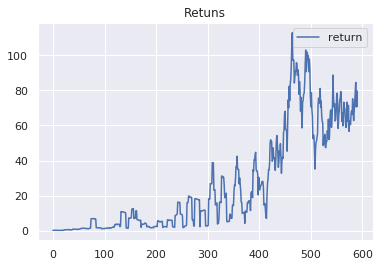

In [112]:
data = pickle.load(open('results/st_cvar_opt_25_lowVmax_600.p', 'rb'))
res = mv(data['returns'][:600, 0], 10)
plt.plot(res, label = 'return')
plt.legend()
plt.title("Retuns")
print("Max return: %g"%(np.max(data['returns'][:, 0])))

Let's Just compare egreedy and optimism

Text(0.5,1,'Returns')

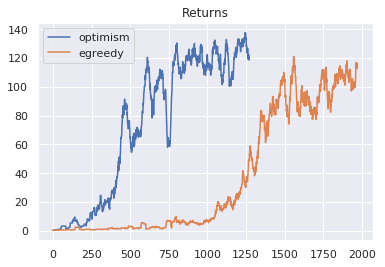

In [180]:
data = pickle.load(open('results/st_cvar_opt_25_lowVmax_1300.p', 'rb'))
res = mv(data['returns'][:1300, 0], 30)
plt.plot(res, label = 'optimism')

data = pickle.load(open('results/st_cvar_25_lowVmax_2000.p', 'rb'))
res = mv(data['returns'][:2000, 0], 30)
plt.plot(res, label = 'egreedy')

plt.legend()
plt.title("Returns")

Tuning:

Text(0.5,1,'Returns')

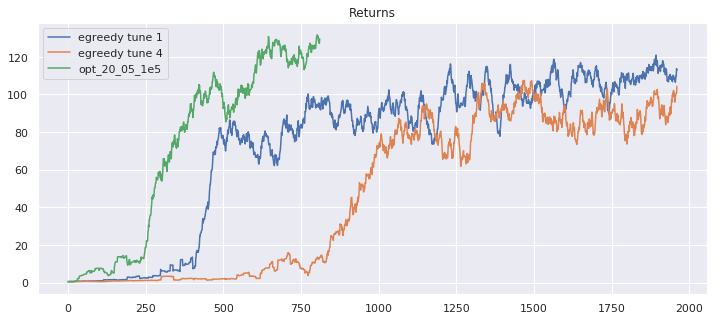

In [187]:
plt.figure(figsize=(12,5))
for i in [1, 4]:
    data = pickle.load(open('results/e_20_tune%d_2000.p'%(i), 'rb'))
    res = mv(data['returns'][:2000, 0], 40)
    plt.plot(res, label = 'egreedy tune %d'%(i))
    
for name in ['opt_20_05_1e5']:
    data = pickle.load(open('results/%s_2000.p'%(name), 'rb'))
    res = mv(data['returns'][:850, 0], 40)
    plt.plot(res, label = name)
    
# data = pickle.load(open('results/st_cvar_opt_25_lowVmax_1300.p', 'rb'))
# res = mv(data['returns'][:1300, 0], 10)
# plt.plot(res, label = 'optimism')

plt.legend()
plt.title("Returns")

Now let's just move egreedy to 50 timesteps and see what happens

Both egreedy and optimism use scaling of 5 * 1e6

Text(0.5,1,'Returns')

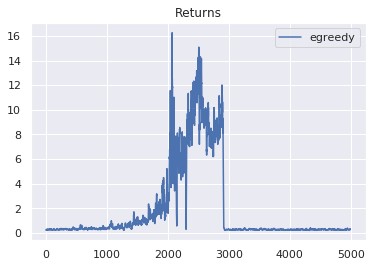

In [197]:
num=5000
data = pickle.load(open('results/st_cvar_50_lowVmax_1e6_%d.p'%(num), 'rb'))
res = mv(data['returns'][:num, 0], 10)
plt.plot(res, label = 'egreedy')

plt.legend()
plt.title("Returns")

Text(0.5,1,'Returns')

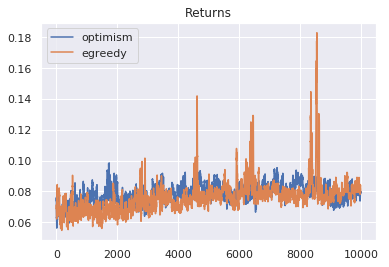

In [195]:
num = 10000
data = pickle.load(open('results/st_cvar_opt_50_lowVmax_%d.p'%(num), 'rb'))
res = mv(data['returns'][:num, 0], 20)
plt.plot(res, label = 'optimism')

data = pickle.load(open('results/st_cvar_50_lowVmax_%d.p'%(num), 'rb'))
res = mv(data['returns'][:num, 0], 20)
plt.plot(res, label = 'egreedy')

plt.legend()
plt.title("Returns")

more runs on 50 steps

Text(0.5,1,'Returns')

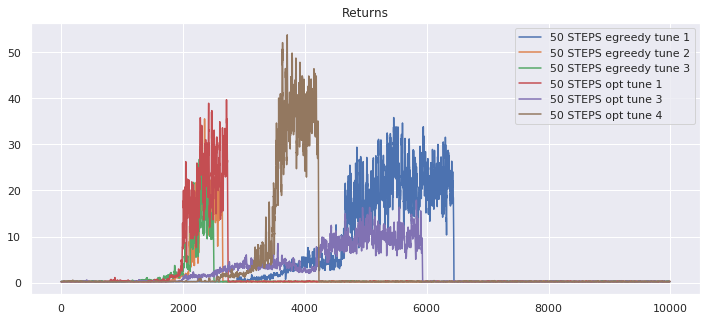

In [204]:
plt.figure(figsize=(12,5))
for i in [1, 2, 3]:
    data = pickle.load(open('results/e_50_tune%d_10000.p'%(i), 'rb'))
    res = mv(data['returns'][:10000, 0], 10)
    plt.plot(res, label = '50 STEPS egreedy tune %d'%(i))

for i in [1, 3, 4]:
    data = pickle.load(open('results/opt_50_tune%d_10000.p'%(i), 'rb'))
    res = mv(data['returns'][:10000, 0], 10)
    plt.plot(res, label = '50 STEPS opt tune %d'%(i))
    
plt.legend()
plt.title("Returns")

with gradient clipping

Text(0.5,1,'Returns')

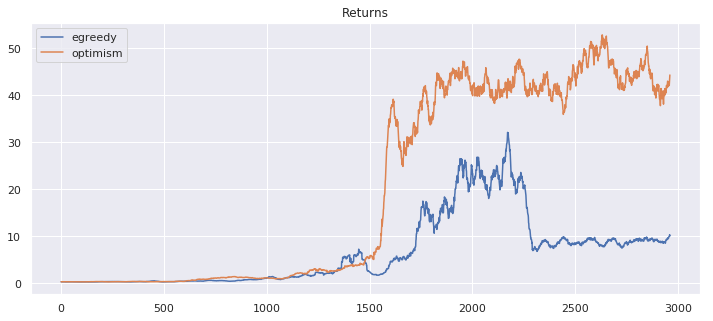

In [258]:
num=3000
plt.figure(figsize=(12,5))
data = pickle.load(open('results/st_cvar_50_lowVmax_1e6_clipped_%d.p'%(num), 'rb'))
res = mv(data['returns'][:num, 0], 40)
plt.plot(res, label = 'egreedy')

data = pickle.load(open('results/st_cvar_opt_50_lowVmax_clipped_debug_%d.p'%(num), 'rb'))
res = mv(data['returns'][:num, 0], 40)
plt.plot(res, label = 'optimism')

plt.legend()
plt.title("Returns")

Now let's set the exact same runs but for 200 steps

Text(0.5,1,'Returns')

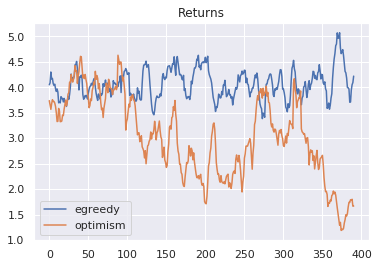

In [256]:
num=400
data = pickle.load(open('results/st_cvar_200_lowVmax_%d.p'%(num), 'rb'))
res = mv(data['returns'][:num, 0], 10)
plt.plot(res, label = 'egreedy')

data = pickle.load(open('results/st_cvar_opt_200_lowVmax_clipped_%d.p'%(num), 'rb'))
res = mv(data['returns'][:num, 0], 10)
plt.plot(res, label = 'optimism')

plt.legend()
plt.title("Returns")

tuning

Text(0.5,1,'Returns')

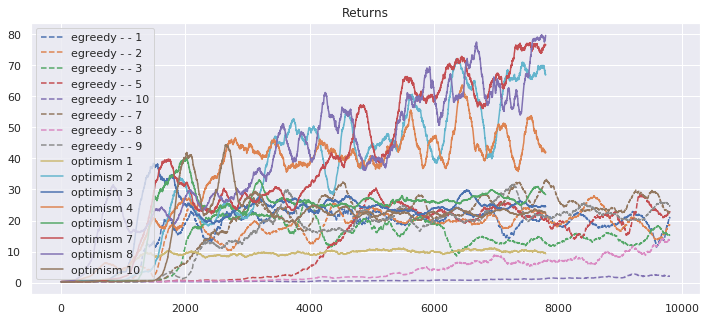

In [55]:
num=10000
plt.figure(figsize=(12, 5))

for tune in [1,2,3,5,10, 7,8,9]:
    data = pickle.load(open('results/e_50_tune%d_%d.p'%(tune, num), 'rb'))
    res = mv(data['returns'][:num, 0], 200)
    plt.plot(res, '--', label = 'egreedy - - %d'%(tune))
num=8000
for tune in [1, 2, 3, 4, 9, 7, 8, 10]:
    data = pickle.load(open('results/opt_50_tune%d_%d.p'%(tune, num), 'rb'))
    res = mv(data['returns'][:num, 0], 200)
    plt.plot(res, label = 'optimism %d'%(tune))

plt.legend()
plt.title("Returns")

In [14]:
data = pickle.load(open('results/e_50_tune%d_all_%d.p'%(6, 10000), 'rb'))

Text(0.5,1,'Non Discouted Returns')

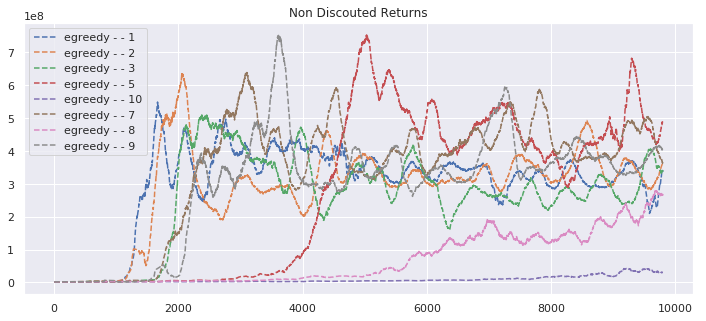

In [60]:
num=10000
plt.figure(figsize=(12, 5))

for tune in [1,2,3,5,10, 7,8,9]:
    data = pickle.load(open('results/e_50_tune%d_all_%d.p'%(tune, num), 'rb'))
    res = mv(np.sum(data['all'][:num, :], axis=-1), 200) *1e6
    plt.plot(res, '--', label = 'egreedy - - %d'%(tune))
# num=8000
# for tune in [4, 8]:
#     data = pickle.load(open('results/opt_50_tune%d_all_%d.p'%(tune, num), 'rb'))
#     res = mv(np.sum(data['all'][:num, :], axis=-1), 200) * 1e6
#     plt.plot(res, label = 'optimism %d'%(tune))

plt.legend()
plt.title("Non Discouted Returns")

In [61]:
# Let's plot the evaluation

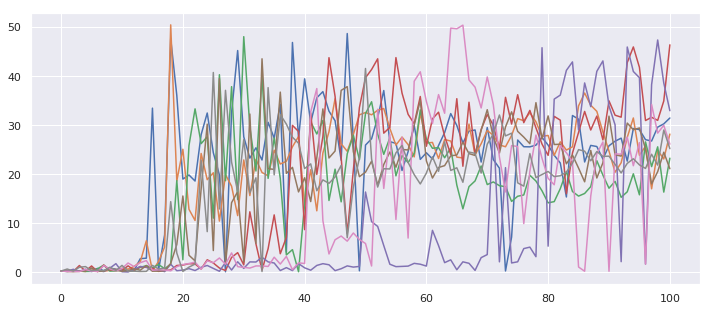

In [70]:
plt.figure(figsize=(12, 5))
for tune in [1,2,3,5,10, 7,8,9]:
    data = pickle.load(open('results/e_50_tune%d_%d.p'%(tune, num), 'rb'))
    plt.plot(np.mean(data['evaluation_returns'], axis=-1))